# Test on Unbalanced Test Data

In [2]:
import os
import numpy as np
import os.path

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams.update({'font.size': 15})

from nideep.eval.learning_curve import LearningCurve
from nideep.eval.eval_utils import Phase

import nideep.eval.log_utils as lu
    # set up Python environment: numpy for numerical routines, and matplotlib for plotting
import h5py
import caffe
from caffe.proto import caffe_pb2
from google.protobuf import text_format
import sensSpec
#plot roc_curve:
import roc_curve
from helper.cacheResults import listSave,listRead

print("Done importing")

soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']
print_soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femS', 'fire',
       'ftStp', 'knock', 'phone', 'piano']

Done importing


# SigmoidCrossEntropy

### 1.raw architecture

In [50]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/03/deploy.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/03/te'

it,sens,spec,bal = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/03/te',
                                                      s_flag=True,
                                                                                  threshold=0.5 ,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results03.npy'
tmpdata = np.array([sens,spec,bal])
np.save(saveFileName,tmpdata)

20 model files


In [51]:
sensSpec.printResult(print_soundTypes,sens,spec,bal)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.152096 	 0.999168 	 0.575632
baby 	 0.942346 	 0.991179 	 0.966763
crash 	 0.666667 	 0.972213 	 0.819440
dog 	 0.876963 	 0.999270 	 0.938117
engine 	 0.421233 	 0.972967 	 0.697100
femS 	 0.940075 	 0.999701 	 0.969888
fire 	 0.903234 	 0.985964 	 0.944599
ftStp 	 0.947432 	 0.989557 	 0.968495
knock 	 1.000000 	 0.998813 	 0.999407
phone 	 0.713499 	 0.999743 	 0.856621
piano 	 0.709786 	 0.992497 	 0.851142


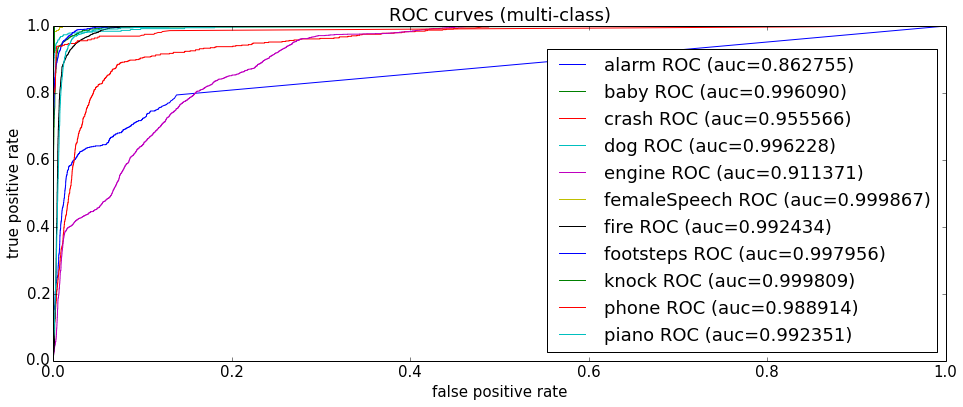

In [52]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/03/te_iter_100000.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=soundTypes)

### 2. shift over time
shift over time domain(-30,30)

In [4]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/21/deploy.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/21/te'

it_t,sens_t,spec_t,bal_t = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/21/te',
                                                      s_flag=True,
                                                                                  threshold=0.5 ,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=80000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results21.npy'
tmpdata = np.array([sens_t,spec_t,bal_t])
np.save(saveFileName,tmpdata)

16 model files


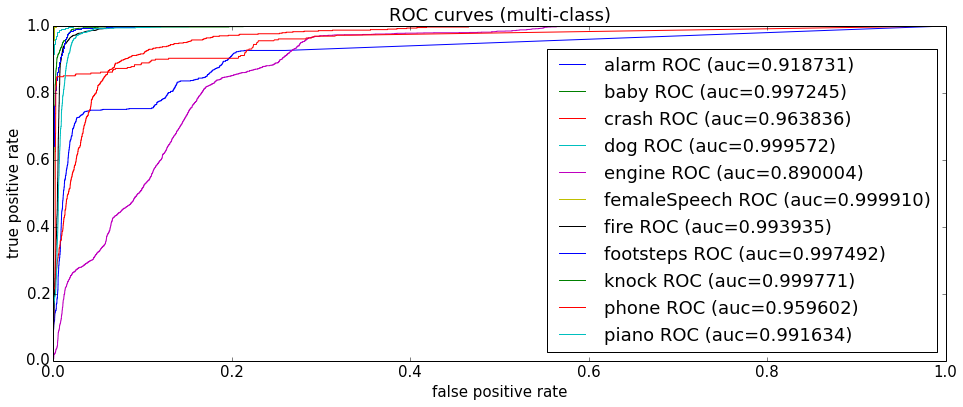

In [54]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/21/te_iter_88155.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=soundTypes)

In [55]:
sensSpec.printResult(print_soundTypes,sens_t,spec_t,bal_t)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.262275 	 0.994047 	 0.628161
baby 	 0.958250 	 0.985931 	 0.972091
crash 	 0.787037 	 0.954542 	 0.870789
dog 	 0.947644 	 0.998240 	 0.972942
engine 	 0.414384 	 0.934501 	 0.674443
femS 	 0.992509 	 0.999060 	 0.995785
fire 	 0.954510 	 0.983851 	 0.969180
ftStp 	 0.923867 	 0.989194 	 0.956531
knock 	 1.000000 	 0.997626 	 0.998813
phone 	 0.848485 	 0.995711 	 0.922098
piano 	 0.696288 	 0.991225 	 0.843756


## t-test(SCE VS. SCE(shift over T))

In [72]:
from scipy.stats import ttest_rel

SCE_sample = bal[-1]
SCE_t_sample = bal_t[-1]
# SCE_sample = sens[-1]
# SCE_t_sample = sens_t[-1]
# SCE_sample = spec[-1]
# SCE_t_sample = spec_t[-1]

t_stat,p = ttest_rel(SCE_sample,SCE_t_sample)
print 't_stat:%f \t prob:%f'%(t_stat,p)

t_stat:-2.233147 	 prob:0.049577


* sensitivity:0.021931
* specficity: 0.071346
* bal_accuracy:0.049577

### 3. shift over time and frequency
shift over time domain(-30,30)

shift over frequency domain(-8,8)

In [57]:
## this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/22/deploy_noshift.prototxt'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/22/te'
it_ft,sens_ft,spec_ft,bal_ft = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix= '/mnt/raid/dnn/cindy/modelfiles/22/te',
                                                      s_flag=True,
                                                                                              threshold=0.5,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=3000,
                                                      max_iter=99000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results22.npy'
tmpdata = np.array([sens_t,spec_t,bal_t])
np.save(saveFileName,tmpdata)

33 model files


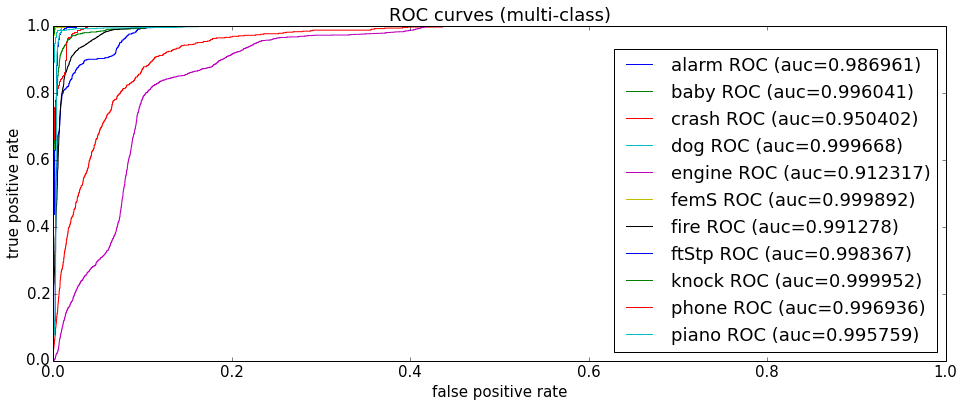

In [58]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/22/te_iter_99000.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=print_soundTypes)

In [59]:
sensSpec.printResult(print_soundTypes,sens_ft,spec_ft,bal_ft)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.710180 	 0.992383 	 0.851282
baby 	 0.939364 	 0.987519 	 0.963441
crash 	 0.793210 	 0.927405 	 0.860308
dog 	 0.965969 	 0.997081 	 0.981525
engine 	 0.565068 	 0.917682 	 0.741375
femS 	 0.996255 	 0.998163 	 0.997209
fire 	 0.927163 	 0.973135 	 0.950149
ftStp 	 0.996979 	 0.980840 	 0.988909
knock 	 1.000000 	 0.993514 	 0.996757
phone 	 0.840220 	 0.991809 	 0.916014
piano 	 0.959505 	 0.993594 	 0.976550


## t-test(shift(T) VS. shift(T,F))

In [69]:
from scipy.stats import ttest_rel

# SCE_ft_sample = bal_ft[-1]
# SCE_t_sample = bal_t[-1]
SCE_ft_sample = sens_ft[-1]
SCE_t_sample = sens_t[-1]
# SCE_ft_sample = spec_ft[-1]
# SCE_t_sample = spec_t[-1]

t_stat,p = ttest_rel(SCE_ft_sample,SCE_t_sample)
print 't_stat:%f \t prob:%f'%(t_stat,p)

t_stat:1.828706 	 prob:0.097382


* sensitivity:0.097382
* specficity:0.037524
* bal_accuracy:0.127183

## t-test(SCE VS. SCE(shift T,F))

In [76]:
from scipy.stats import ttest_rel

# SCE_ft_sample = bal_ft[-1]
# SCE_sample = bal[-1]
# SCE_ft_sample = sens_ft[-1]
# SCE_sample = sens[-1]
SCE_ft_sample = spec_ft[-1]
SCE_sample = spec[-1]

t_stat,p = ttest_rel(SCE_ft_sample,SCE_sample)
print 't_stat:%f \t prob:%f'%(t_stat,p)

t_stat:-2.393400 	 prob:0.037739


* sensitivity:0.023469
* specficity:0.037739
* bal_accuracy:0.038820

### 4. without dropout layer(shift over T,F)

shift over time domain(-30,30)

shift over frequency domain(-8,8)

In [77]:
## this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/24/deploy.prototxt'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/24/te'
it_nd,sens_nd,spec_nd,bal_nd = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix= '/mnt/raid/dnn/cindy/modelfiles/24/te',
                                                      s_flag=True,
                                                                                              threshold=0.5,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)
# ## save the results in cache:
# listSave(sens_list_SCE_st,spec_list_SCE_st,bal_acclist_SCE_st,21,resultType='test',snapshot=5000,max_iter=65000)
# it_list_SCE_st,sens_list_SCE_st,spec_list_SCE_st,bal_acclist_SCE_st = listRead(21,resultType='test')

20 model files


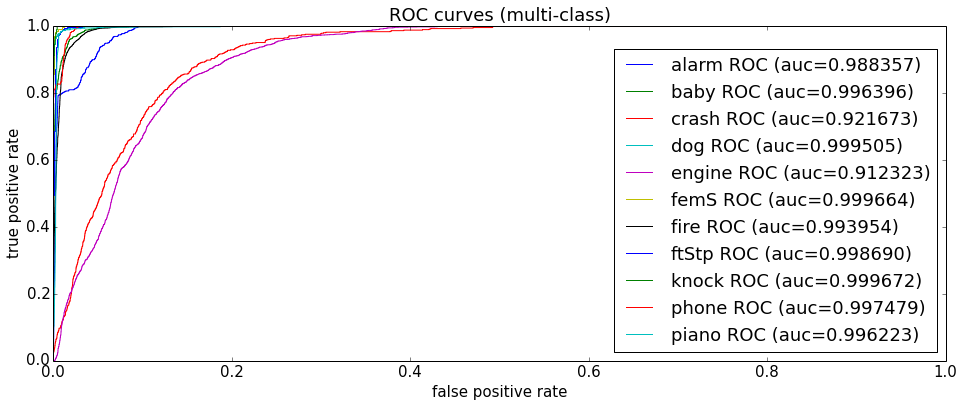

In [78]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/24/te_iter_100000.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=print_soundTypes)

In [79]:
sensSpec.printResult(print_soundTypes,sens_nd,spec_nd,bal_nd)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.794012 	 0.993303 	 0.893657
baby 	 0.949304 	 0.982844 	 0.966074
crash 	 0.608025 	 0.926190 	 0.767107
dog 	 0.979058 	 0.993261 	 0.986159
engine 	 0.571918 	 0.923726 	 0.747822
femS 	 0.977528 	 0.997694 	 0.987611
fire 	 0.941099 	 0.978719 	 0.959909
ftStp 	 0.995166 	 0.983927 	 0.989547
knock 	 1.000000 	 0.992073 	 0.996036
phone 	 0.826446 	 0.993224 	 0.909835
piano 	 0.976378 	 0.992936 	 0.984657


## t-test(SCE(shift T,F) VS. SCE(shift T,F;no drop-out))

In [82]:
from scipy.stats import ttest_rel

SCE_ft_sample = bal_ft[-1]
SCE_nd_sample = bal_nd[-1]
# SCE_ft_sample = sens_ft[-1]
# SCE_nd_sample = sens_nd[-1]
# SCE_ft_sample = spec_ft[-1]
# SCE_nd_sample = spec_nd[-1]

t_stat,p = ttest_rel(SCE_ft_sample,SCE_nd_sample)
print 't_stat:%f \t prob:%f'%(t_stat,p)

t_stat:0.323085 	 prob:0.753285


* sensitivity:0.734902
* specficity:0.685150
* bal_accuracy:0.753285

## plotting

last iteration acc-measurements for alarm
	 SCE 	 	 SCE_ndrp 
sens	 0.710180 	 0.794012
spec 	 0.992383 	 0.993303
bal 	 0.851282 	 0.893657
last iteration acc-measurements for baby
	 SCE 	 	 SCE_ndrp 
sens	 0.939364 	 0.949304
spec 	 0.987519 	 0.982844
bal 	 0.963441 	 0.966074
last iteration acc-measurements for crash
	 SCE 	 	 SCE_ndrp 
sens	 0.793210 	 0.608025
spec 	 0.927405 	 0.926190
bal 	 0.860308 	 0.767107
last iteration acc-measurements for dog
	 SCE 	 	 SCE_ndrp 
sens	 0.965969 	 0.979058
spec 	 0.997081 	 0.993261
bal 	 0.981525 	 0.986159
last iteration acc-measurements for engine
	 SCE 	 	 SCE_ndrp 
sens	 0.565068 	 0.571918
spec 	 0.917682 	 0.923726
bal 	 0.741375 	 0.747822
last iteration acc-measurements for femaleSpeech
	 SCE 	 	 SCE_ndrp 
sens	 0.996255 	 0.977528
spec 	 0.998163 	 0.997694
bal 	 0.997209 	 0.987611
last iteration acc-measurements for fire
	 SCE 	 	 SCE_ndrp 
sens	 0.927163 	 0.941099
spec 	 0.973135 	 0.978719
bal 	 0.950149 	 0.959909
last iter

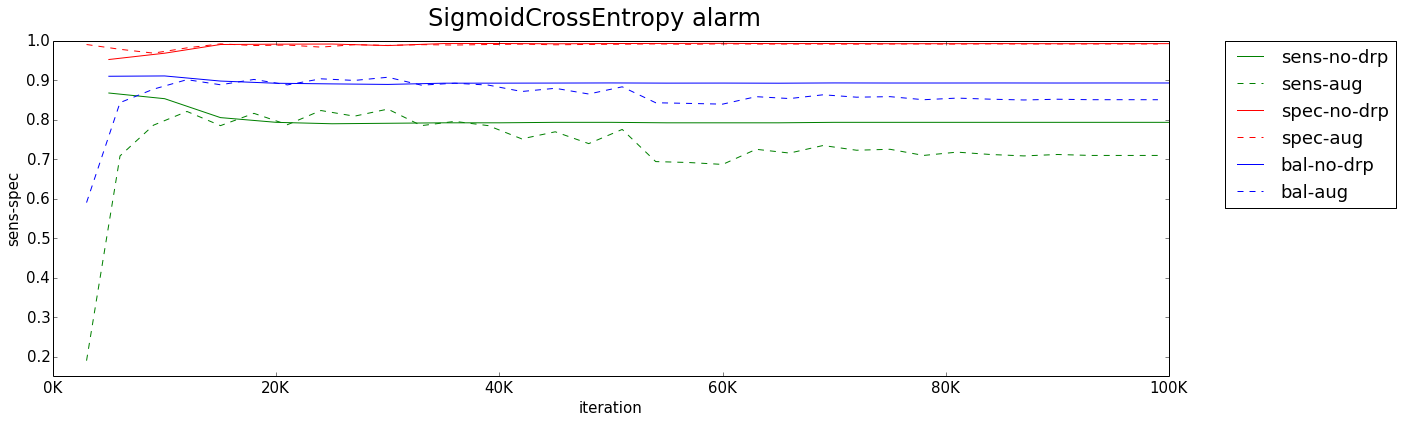

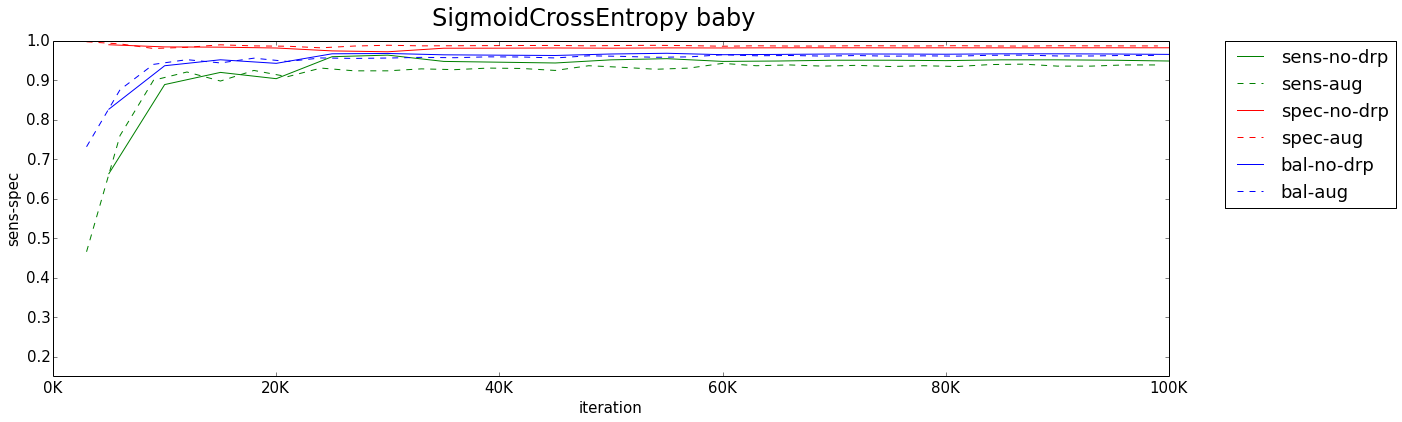

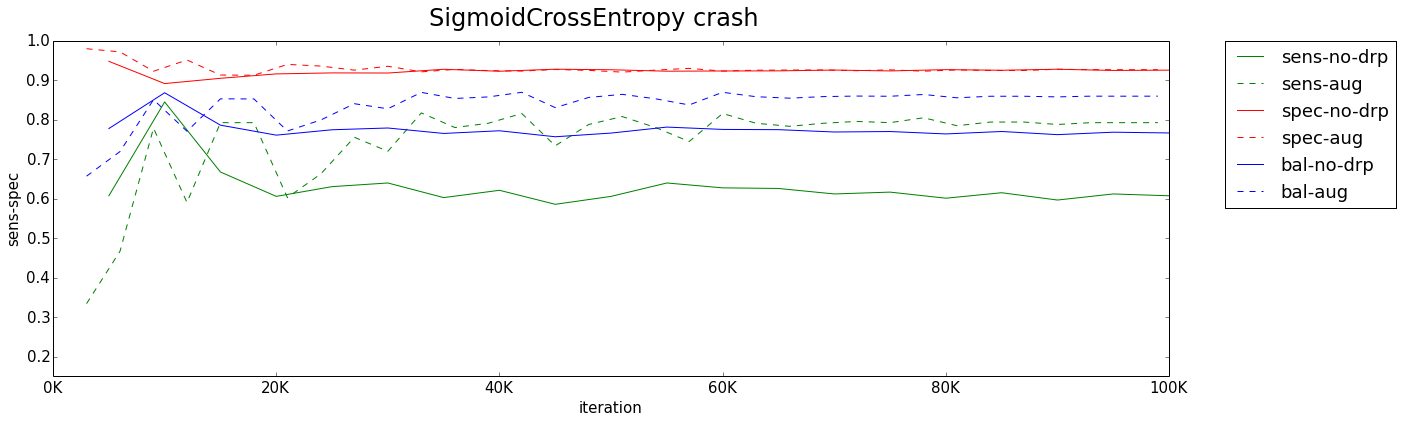

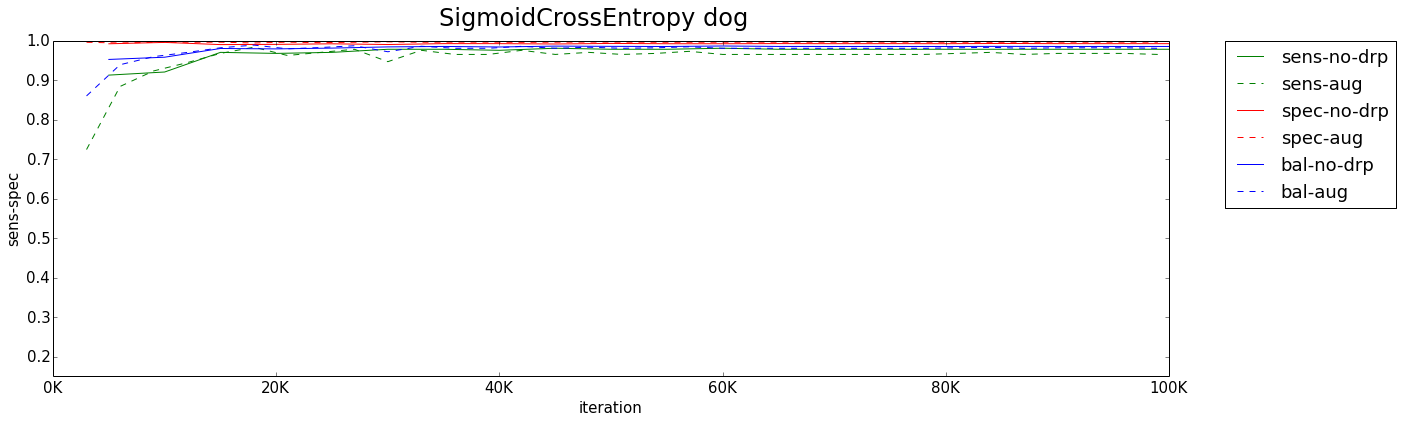

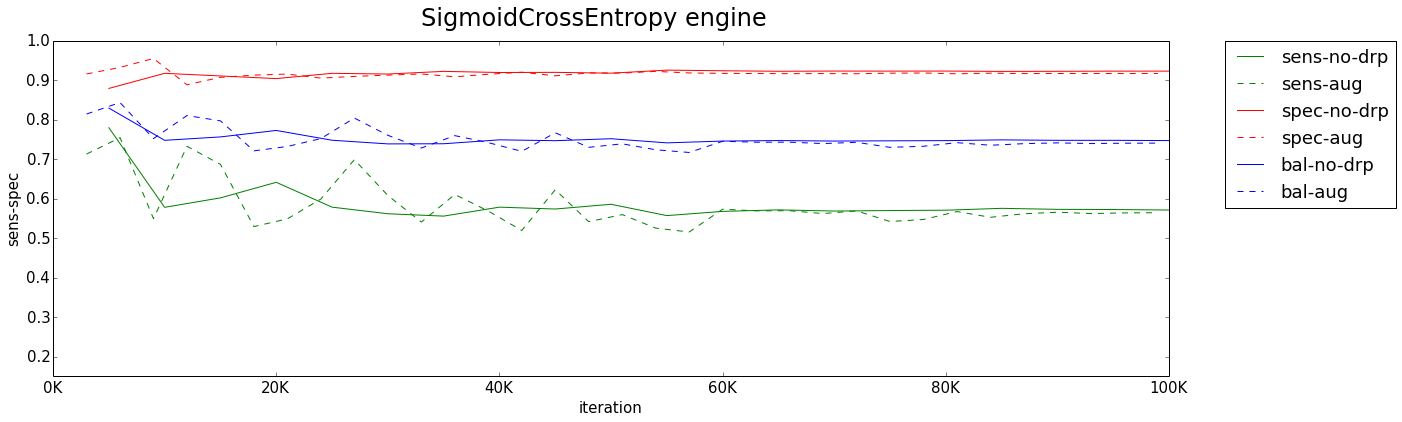

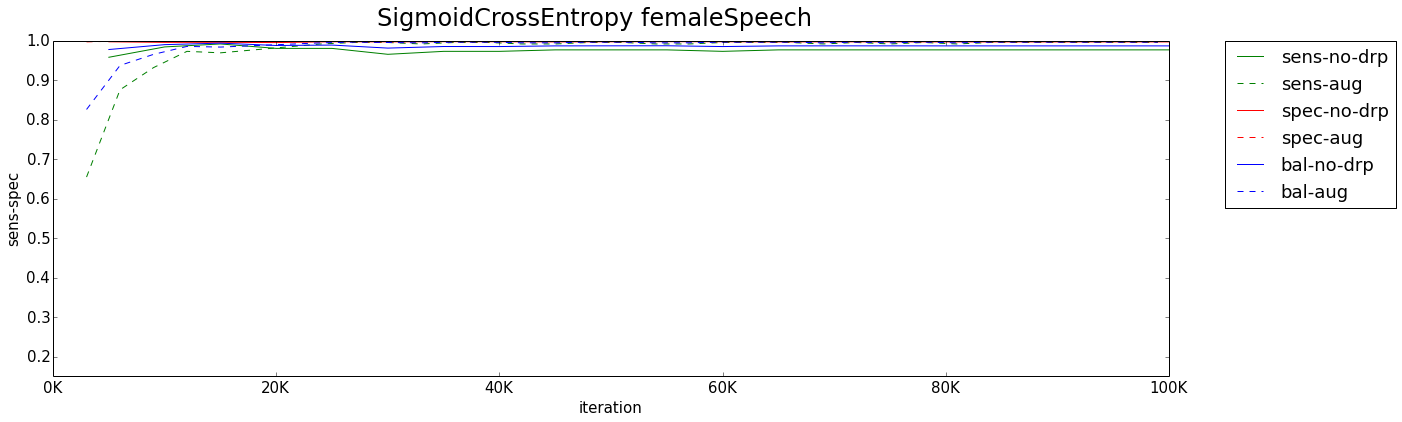

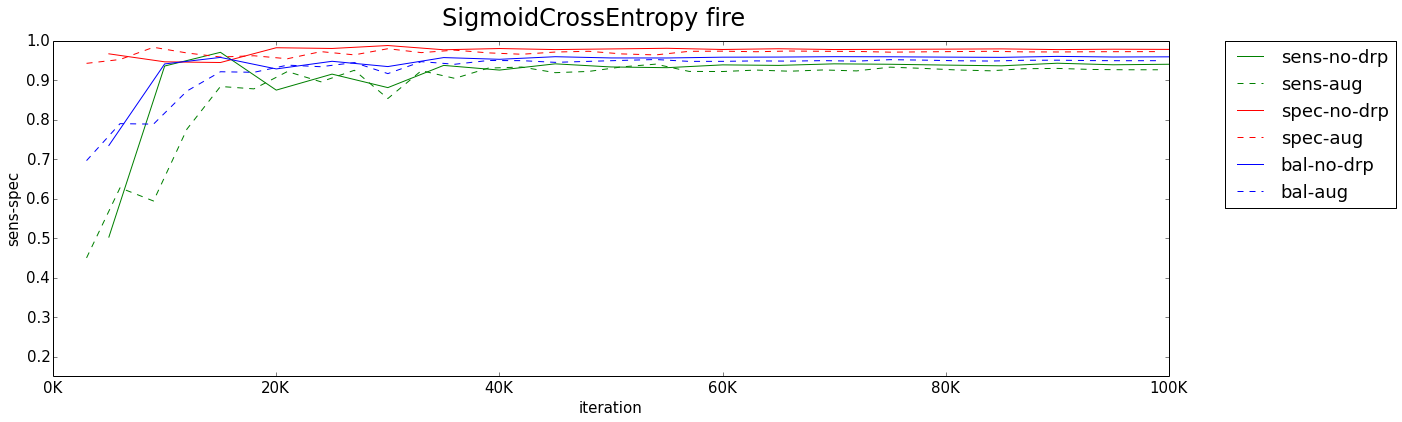

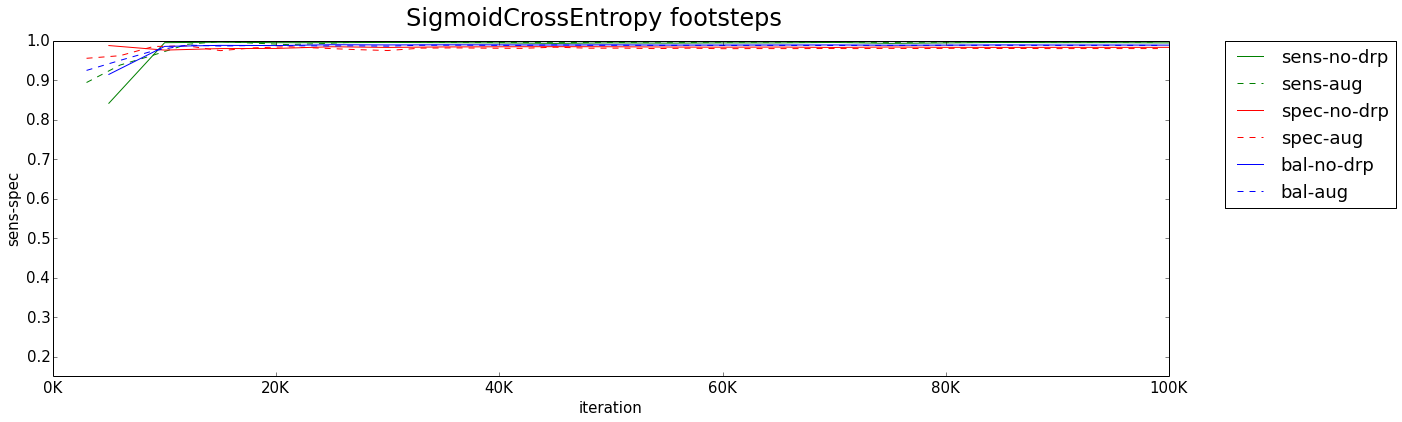

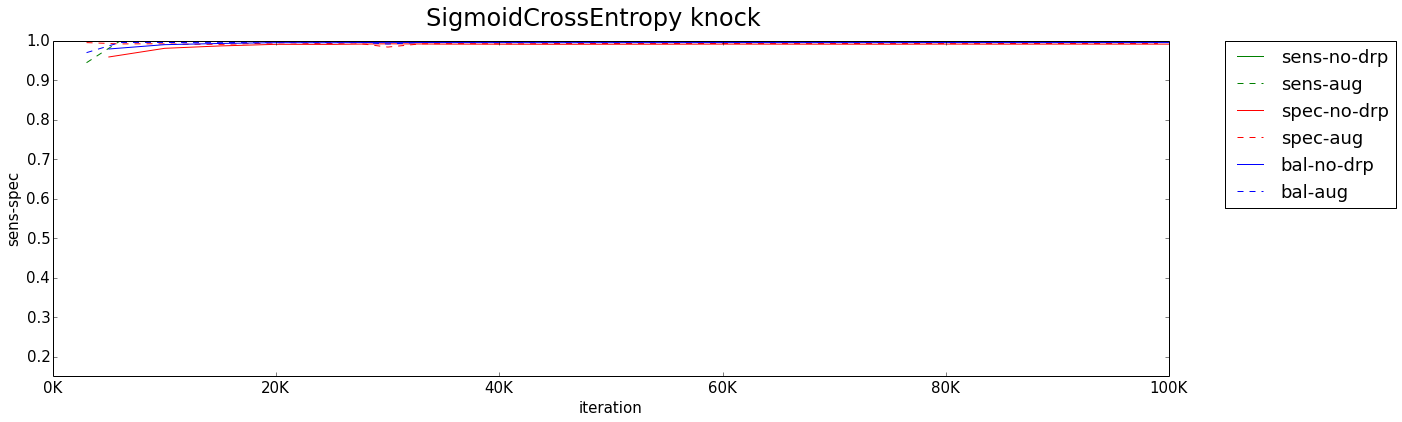

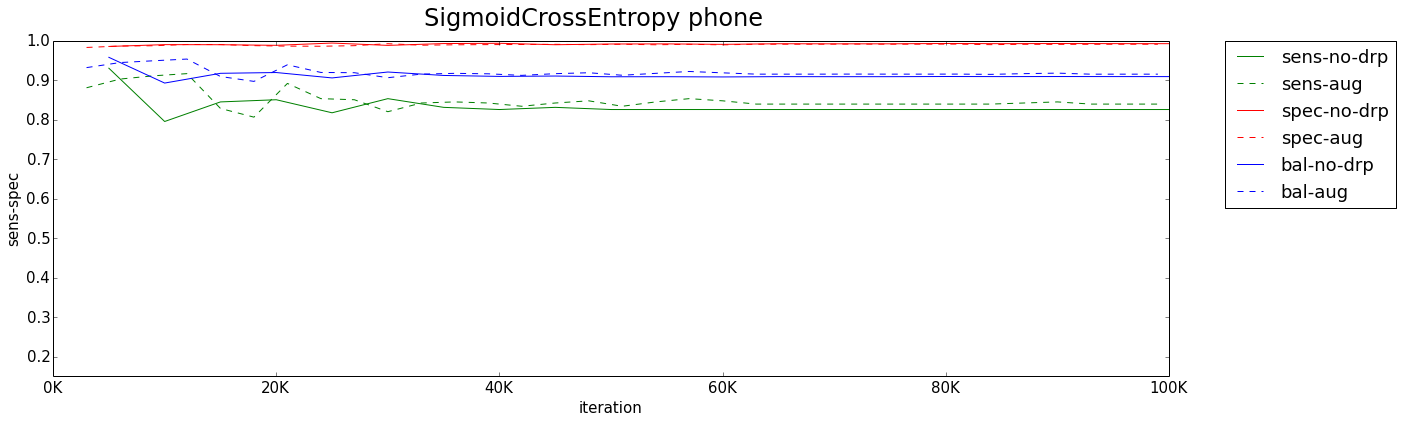

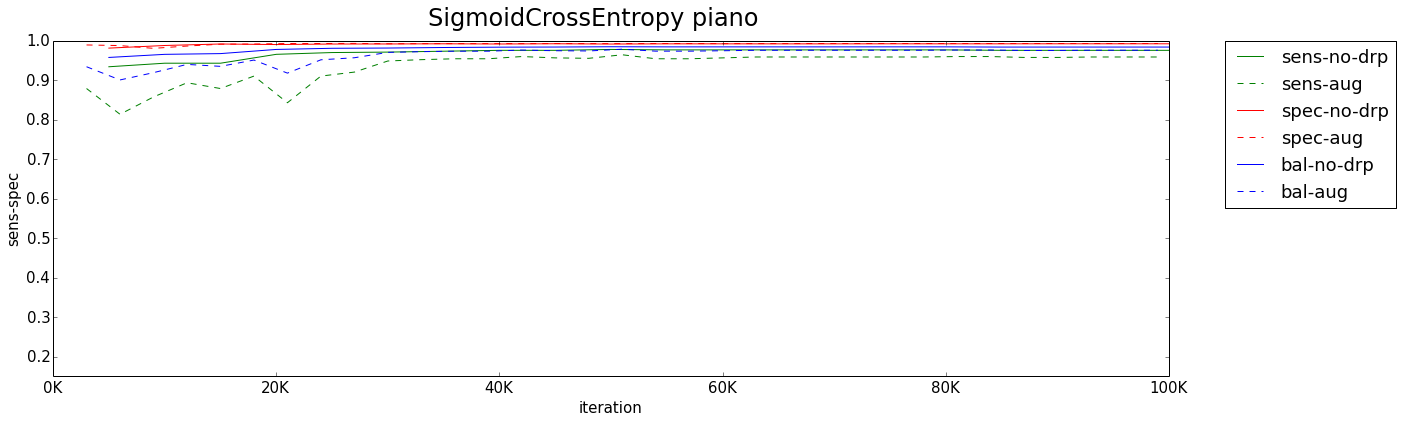

In [12]:
#####################plot#####################
K = len(soundTypes)  #get number of class labels

#get y aixs range
accValues = np.concatenate((sens_list_SCE_ft,
                           sens_list_SCE,
                           spec_list_SCE_ft,
                           spec_list_SCE,
                          bal_acclist_SCE_ft,
                          bal_acclist_SCE,
                           sens_list_aug_nd,
                            spec_list_aug_nd,
                            bal_acclist_aug_nd))
minY = np.min(accValues)
maxY = np.max(accValues)
for s in range(K):
    plt.figure(figsize=(20,6))
    plt.suptitle('SigmoidCrossEntropy '+soundTypes[s],fontsize=24)
    
#     plt.plot(it_list_SCE, sens_list_SCE[:,s],color='green',label='sens')
    plt.plot(it_list_aug_nd, sens_list_aug_nd[:,s],color='green',label='sens-no-drp')
    plt.plot(it_list_SCE_ft, sens_list_SCE_ft[:,s],'--',color='green',label='sens-aug')

    
#     plt.plot(it_list_SCE, spec_list_SCE[:,s], color='red',label='spec')
    plt.plot(it_list_aug_nd, spec_list_aug_nd[:,s], color='red',label='spec-no-drp')
    plt.plot(it_list_SCE_ft, spec_list_SCE_ft[:,s],'--',color='red',label='spec-aug')
    
#     plt.plot(it_list_SCE, bal_acclist_SCE[:,s],color='blue',label='bal')
    plt.plot(it_list_aug_nd, bal_acclist_aug_nd[:,s],color='blue',label='bal-no-drp')
    plt.plot(it_list_SCE_ft, bal_acclist_SCE_ft[:,s],'--',color='blue',label='bal-aug')
    
    plt.xlabel('iteration')
    plt.ylabel('sens-spec')
    
    plt.ylim((minY,maxY))
    ticks, _ = plt.xticks()
    
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

#     plt.legend(loc=0,prop={'size':15})
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})

    ########## TODO ###########
    # save the plots under the directory you choose
#     plt.savefig(root_path+'acc_measures'+str(s+1).zfill(2)+soundTypes[s]+'.png')

    # print the values from last iteration
    print 'last iteration acc-measurements for %s'%soundTypes[s]
#     print '\t SCE \t SCE_ndrp '
    print '\t SCE \t \t SCE_ndrp '
    print 'sens\t %f \t %f'%(sens_list_SCE_ft[-1,s],sens_list_aug_nd[-1,s])
    print 'spec \t %f \t %f'%(spec_list_SCE_ft[-1,s],spec_list_aug_nd[-1,s])
    print 'bal \t %f \t %f'%(bal_acclist_SCE_ft[-1,s],bal_acclist_aug_nd[-1,s])

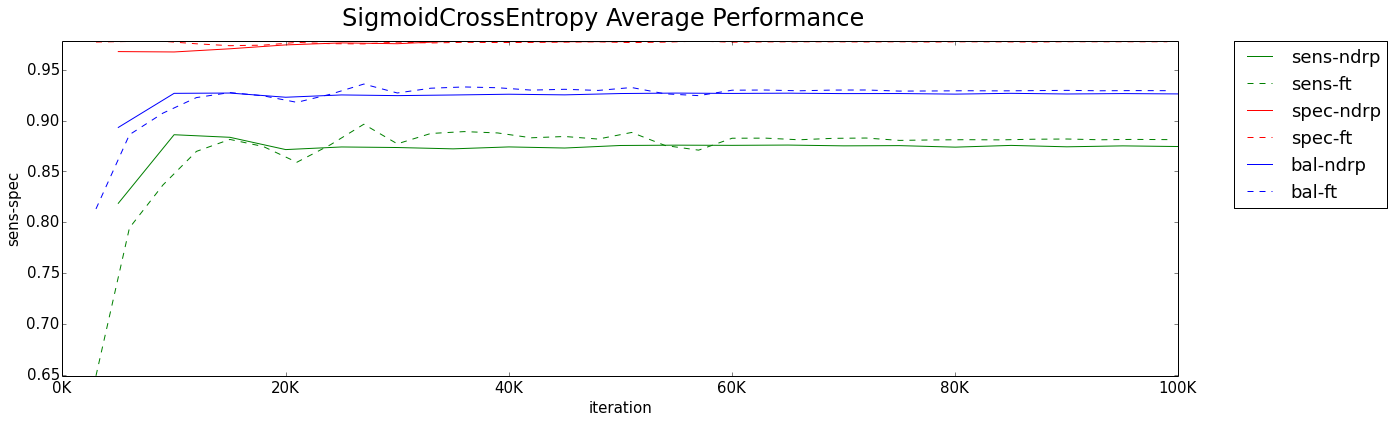

average balanced accuracy
	 SCE_nd 	  SCE 
sens	 0.874449 	 0.881265
spec 	 0.977990 	 0.977557
bal 	 0.926220 	 0.929411


In [20]:
avSensSCE_ft = np.mean(sens_list_SCE_ft,axis=1)
avSpecSCE_ft = np.mean(spec_list_SCE_ft,axis=1)
avBalSCE_ft = np.mean(bal_acclist_SCE_ft,axis=1)

avSensSCE_nd = np.mean(sens_list_aug_nd,axis=1)
avSpecSCE_nd = np.mean(spec_list_aug_nd,axis=1)
avBalSCE_nd = np.mean(bal_acclist_aug_nd,axis=1)

accValues = np.concatenate((avSensSCE_nd,
                            avSpecSCE_nd,
                            avBalSCE_nd,
                           avSensSCE_ft,
                          avSpecSCE_ft,
                          avBalSCE_ft))
minY = np.min(accValues)
maxY = np.max(accValues)
plt.figure(figsize=(20,6))
plt.suptitle('SigmoidCrossEntropy Average Performance',fontsize=24)
    
plt.plot(it_list_SCE, avSensSCE_nd,color='green',label='sens-ndrp')
plt.plot(it_list_SCE_ft, avSensSCE_ft,'--',color='green',label='sens-ft')

    
plt.plot(it_list_SCE, avSpecSCE_nd, color='red',label='spec-ndrp')
plt.plot(it_list_SCE_ft, avSpecSCE_ft,'--',color='red',label='spec-ft')
    
plt.plot(it_list_SCE, avBalSCE_nd,color='blue',label='bal-ndrp')
plt.plot(it_list_SCE_ft, avBalSCE_ft,'--',color='blue',label='bal-ft')
    
plt.xlabel('iteration')
plt.ylabel('sens-spec')
    
plt.ylim((minY,maxY))

ticks, _ = plt.xticks()
    
plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})
plt.show()

######print average#######
print 'average balanced accuracy'
print '\t SCE_nd \t  SCE '
print 'sens\t %f \t %f'%(avSensSCE_nd[-1],avSensSCE_ft[-1])
print 'spec \t %f \t %f'%(avSpecSCE_nd[-1],avSpecSCE_ft[-1])
print 'bal \t %f \t %f'%(avBalSCE_nd[-1],avBalSCE_ft[-1])

### average accuracy measure

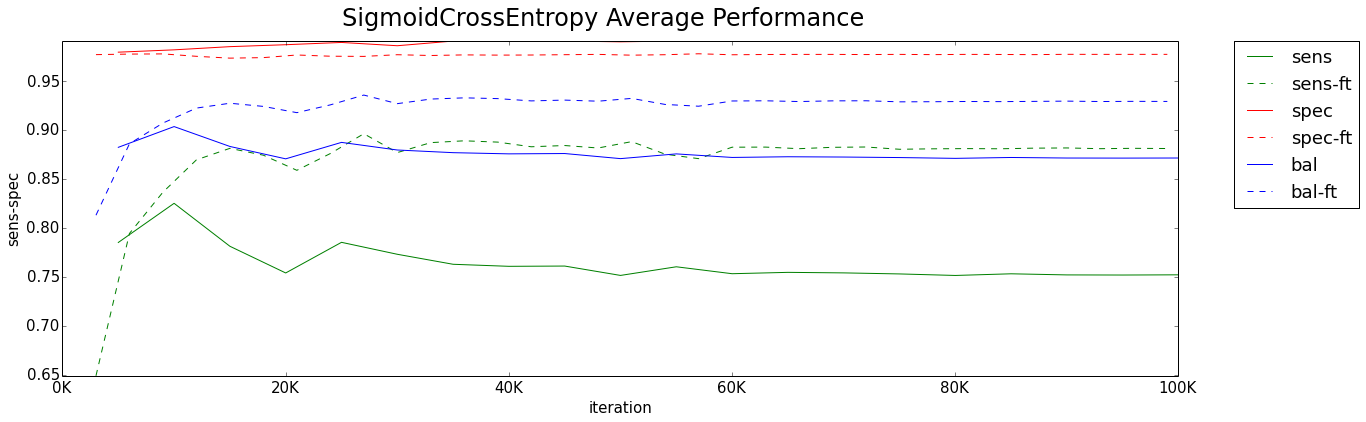

average balanced accuracy
	 SCE 	 	 SCE_aug 
sens	 0.752121 	 0.881265
spec 	 0.991007 	 0.977557
bal 	 0.871564 	 0.929411


In [19]:
avSensSCE = np.mean(sens_list_SCE,axis=1)
avSpecSCE = np.mean(spec_list_SCE,axis=1)
avBalSCE = np.mean(bal_acclist_SCE,axis=1)

avSensSCE_ft = np.mean(sens_list_SCE_ft,axis=1)
avSpecSCE_ft = np.mean(spec_list_SCE_ft,axis=1)
avBalSCE_nd = np.mean(bal_acclist_SCE_ft,axis=1)

avSensSCE_nd = np.mean(sens_list_aug_nd,axis=1)
avSpecSCE_nd = np.mean(spec_list_aug_nd,axis=1)
avBalSCE_nd = np.mean(bal_acclist_aug_nd,axis=1)

accValues = np.concatenate((avSensSCE,
                           avSpecSCE,
                           avBalSCE,
                           avSensSCE_ft,
                          avSpecSCE_ft,
                          avBalSCE_ft))
minY = np.min(accValues)
maxY = np.max(accValues)
plt.figure(figsize=(20,6))
plt.suptitle('SigmoidCrossEntropy Average Performance',fontsize=24)
    
plt.plot(it_list_SCE, avSensSCE,color='green',label='sens')
plt.plot(it_list_SCE_ft, avSensSCE_ft,'--',color='green',label='sens-ft')

    
plt.plot(it_list_SCE, avSpecSCE, color='red',label='spec')
plt.plot(it_list_SCE_ft, avSpecSCE_ft,'--',color='red',label='spec-ft')
    
plt.plot(it_list_SCE, avBalSCE,color='blue',label='bal')
plt.plot(it_list_SCE_ft, avBalSCE_ft,'--',color='blue',label='bal-ft')
    
plt.xlabel('iteration')
plt.ylabel('sens-spec')
    
plt.ylim((minY,maxY))

ticks, _ = plt.xticks()
    
plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})
plt.show()

######print average#######
print 'average balanced accuracy'
print '\t SCE \t \t SCE_aug '
print 'sens\t %f \t %f'%(avSensSCE[-1],avSensSCE_ft[-1])
print 'spec \t %f \t %f'%(avSpecSCE[-1],avSpecSCE_ft[-1])
print 'bal \t %f \t %f'%(avBalSCE[-1],avBalSCE_ft[-1])